## INSTALLATION AND SETUP

In [1]:
#pip install -q tensorflow-gpu

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## IMPORTING THE DATASET

In [13]:
# Installing Kaggle API
!pip install -q kaggle

In [14]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [15]:
# Import API key to google colab

In [16]:
#copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [17]:
#disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [18]:
# list of kaggle datasets
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39          10237       1409  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           2314         76  1.0              
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           6845        175  1.0              
muratkokludataset/acoustic-extinguisher-fire-

In [19]:
# importing the dataset
! kaggle datasets download -d tongpython/cat-and-dog

 89% 193M/218M [00:00<00:00, 208MB/s]
100% 218M/218M [00:01<00:00, 226MB/s]


In [20]:
# unzipping the dataset
! unzip -q /content/cat-and-dog.zip

## BUILDING THE MODEL

In [21]:
# Creating an object
model = tf.keras.models.Sequential()

In [22]:
# Adding first CNN layer (input layer)
# 1) filters = 64
# 2) kernel size = 3
# 3) padding = same
# 4) activation = relu
# 5) input shape = (32,32,3)
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu",input_shape=(32,32,3)))

In [23]:
# Adding maxpool layer
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

In [24]:
# adding 2nd CNN and maxpool layer
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

In [25]:
# adding flatten layer
model.add(tf.keras.layers.Flatten())

In [26]:
# adding dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [27]:
# adding fully connected layer
model.add(tf.keras.layers.Dense(units=128,activation="relu"))

In [28]:
# adding output layer
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [29]:
# compiling the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dropout (Dropout)           (None, 4096)              0

## FITTING CNN TO THE IMAGES

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [33]:
# rescale images
datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
training_set = datagen.flow_from_directory(directory = training_data_dir,
                                           target_size = (32,32),
                                           classes = ['dogs','cats'],
                                           class_mode = 'binary',
                                           batch_size = 20)
test_set = datagen.flow_from_directory(directory = test_data_dir,
                                           target_size = (32,32),
                                           classes = ['dogs','cats'],
                                           class_mode = 'binary',
                                           batch_size = 20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [35]:
len(training_set),len(test_set)

(401, 102)

In [36]:
len(training_set)*20,len(test_set)*20

(8020, 2040)

In [37]:
test_set.batch_size

20

In [38]:
history = model.fit_generator(generator = training_set, steps_per_epoch=401, epochs = 20, validation_data = test_set, validation_steps = 102)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
401/401 [==============================] - 55s 135ms/step - loss: 0.6770 - accuracy: 0.5756 - val_loss: 0.6451 - val_accuracy: 0.6100
Epoch 2/20
401/401 [==============================] - 55s 137ms/step - loss: 0.6075 - accuracy: 0.6705 - val_loss: 0.6118 - val_accuracy: 0.6589
Epoch 3/20
401/401 [==============================] - 55s 137ms/step - loss: 0.5586 - accuracy: 0.7133 - val_loss: 0.5526 - val_accuracy: 0.7187
Epoch 4/20
401/401 [==============================] - 55s 137ms/step - loss: 0.5211 - accuracy: 0.7397 - val_loss: 0.5365 - val_accuracy: 0.7291
Epoch 5/20
401/401 [==============================] - 56s 138ms/step - loss: 0.4890 - accuracy: 0.7648 - val_loss: 0.5616 - val_accuracy: 0.7247
Epoch 6/20
401/401 [==============================] - 56s 138ms/step - loss: 0.4617 - accuracy: 0.7775 - val_loss: 0.5192 - val_accuracy: 0.7489
Epoch 7/20
401/401 [==============================] - 55s 136ms/step - loss: 0.4360 - accuracy: 0.7983 - val_loss: 0.5024 - val_ac

## PLOTTING THE LEARNING CURVE

In [40]:
def learning_curve(history,epoch):
  # training vs validation accuracy
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()
  # training vs validation loss
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

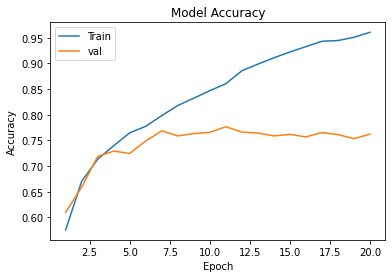

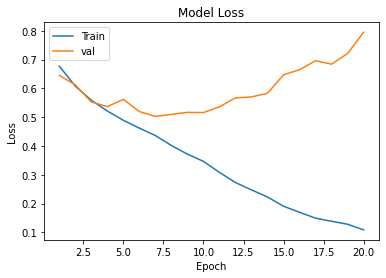

In [41]:
learning_curve(history,20)